In [4]:
import pandas as pd

Read dataset and filter by IsCanceled equal 1 (True)

In [5]:
data = pd.read_csv('./H1.csv')
canceled_dataset = data.loc[data.IsCanceled == 1]

Create year-week column using `ArrivalDateYear` and `ArrivalDateWeekNumber`

In [6]:
 canceled_dataset.loc[:,'YearWeek']  = canceled_dataset.loc[:,"ArrivalDateYear"].map(str) + canceled_dataset.loc[:,"ArrivalDateWeekNumber"].map(str)

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


group by `YearWeek` and sum column `IsCanceled`

In [7]:
grp_canceled = canceled_dataset.groupby('YearWeek', as_index=False).sum('IsCanceled')
grp_canceled = grp_canceled.loc[:,['YearWeek','IsCanceled']]

head of the transformed dataset 

In [8]:
grp_canceled.head(10)

,YearWeek,IsCanceled
0,201527,41
1,201528,48
2,201529,87
3,201530,74
4,201531,101
5,201532,68
6,201533,96
7,201534,69
8,201535,88
9,201536,148


In [9]:
grp_canceled.to_csv('./canceledByWeek.csv',index=False)

plot data to check time series  

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

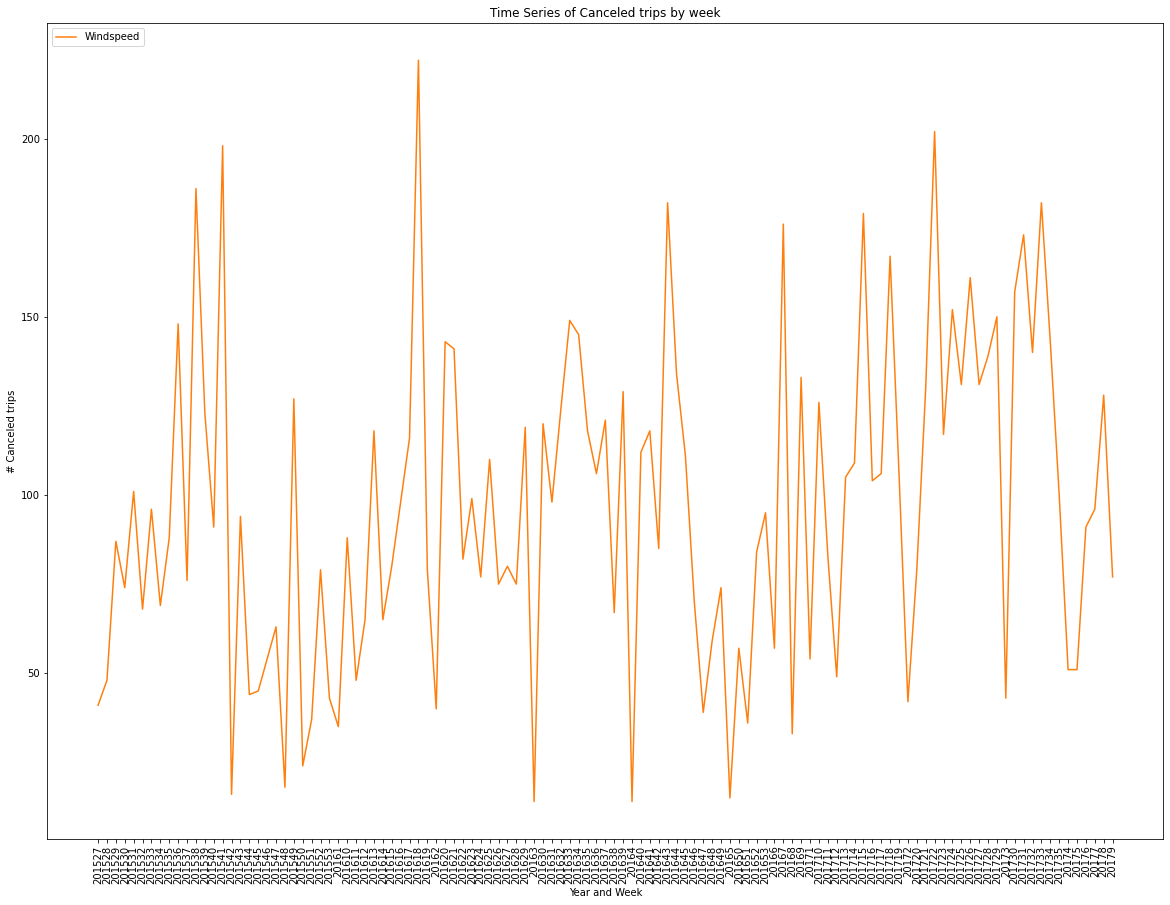

In [11]:
fig, ax = plt.subplots(figsize=(20,15))

ax.plot(grp_canceled.YearWeek, grp_canceled.IsCanceled, color='tab:orange', label='Windspeed')

ax.set_xlabel('Year and Week')
plt.xticks(rotation=90)
ax.set_ylabel('# Canceled trips')
ax.set_title('Time Series of Canceled trips by week')
ax.legend(loc='upper left');